# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


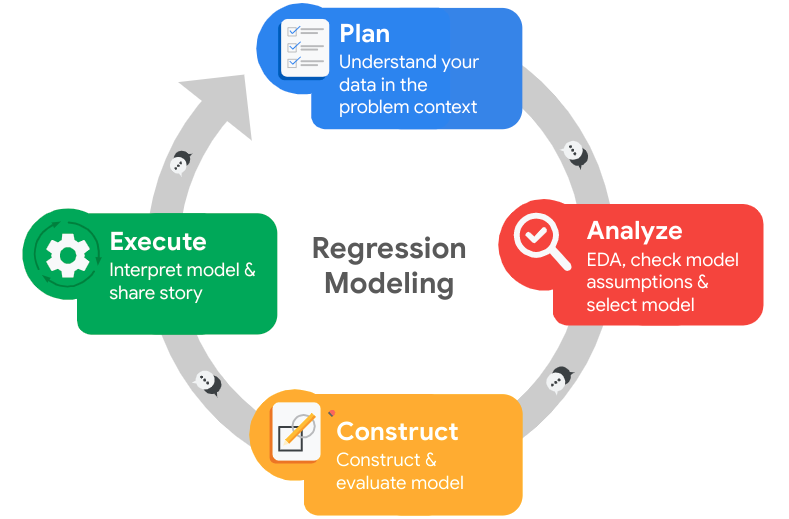

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




-The stakeholders for this project is HR and the rest of the company at Salifort Motors.
-I am trying to predict which customers are likely to quit. 
-Mostly all of the variables can be useful for this project.
-

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 

pd.set_option("display.max_columns", None)

from xgboost import XGBClassifier 
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

import pickle 

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={"average_montly_hours": "average_monthly_hours",
                          "Work_accident": "work_accident", 
                          "Department": "department",
                          "time_spend_company": "tenure"})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates(keep="first")

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

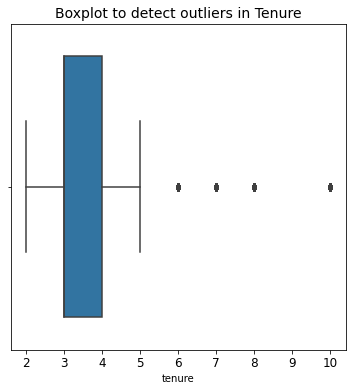

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(6,6))
plt.title("Boxplot to detect outliers in Tenure", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1["tenure"])
plt.show()

In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
percentile25 = df1["tenure"].quantile(0.25)
percentile75 = df1["tenure"].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit:", upper_limit)
print("Lower limit:", lower_limit)

outliers = df1[(df1["tenure"] > upper_limit) | (df1["tenure"] < lower_limit)]

print("Number of rows containing outliers in tenure data:", len(outliers))

Upper limit: 5.5
Lower limit: 1.5
Number of rows containing outliers in tenure data: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




There are 14,999 entries. 
1991 employees left (0.166%)
10,000 employees stayed (0.833%)

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1["left"].value_counts())
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1["left"].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

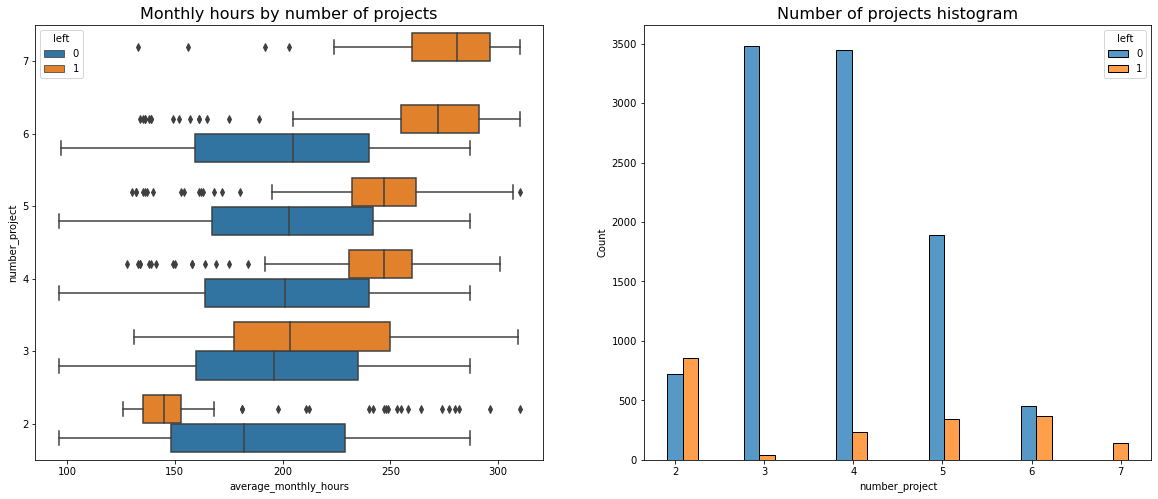

In [14]:
# Create a plot as needed
#boxplot showing average_monthly_hours distributions for number_project, 
#comparing the distributions of employees who stayed versus those who left.
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize=(20,8))

sns.boxplot(data=df1, x="average_monthly_hours", y="number_project", hue="left", orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title("Monthly hours by number of projects", fontsize=16)

tenure_stay = df1[df1["left"] == 0]["number_project"]
tenure_left = df1[df1["left"] == 1]["number_project"]
sns.histplot(data=df1, x= "number_project", hue="left", multiple="dodge", shrink=2, ax=ax[1])
ax[1].set_title("Number of projects histogram", fontsize=16)

plt.show()

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###
#Confirming that all employees with 7 projects left
df1[df1["number_project"]==7]["left"].value_counts()

1    145
Name: left, dtype: int64

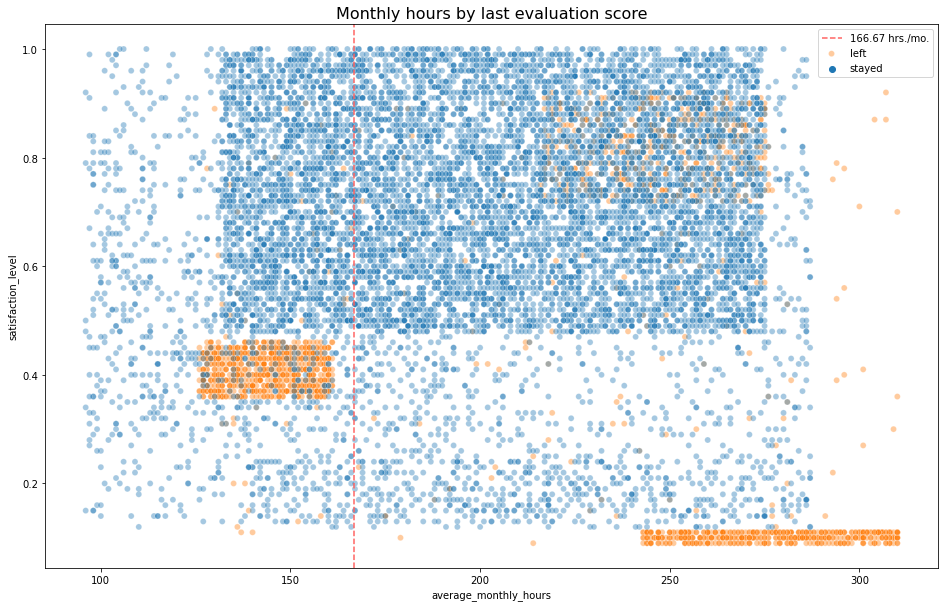

In [16]:
# Create a plot as needed
#Scatterplot of "average_monthly_hours" vs "satisfaction_level" of those who stayed and left
### YOUR CODE HERE ###
plt.figure(figsize=(16, 10))
sns.scatterplot(data=df1, x="average_monthly_hours", y="satisfaction_level", hue="left", alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title("Monthly hours by last evaluation score", fontsize=16)
plt.show()

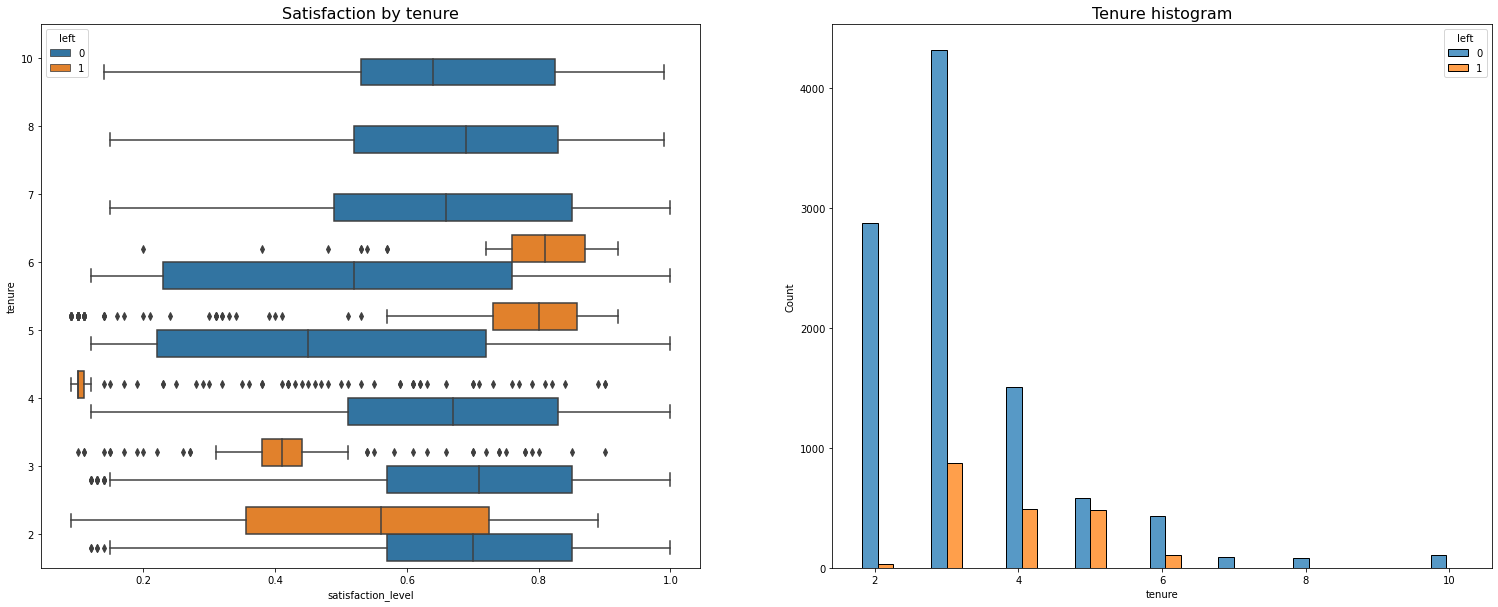

In [17]:
# Create a plot as needed
#Visualizing satisfactionlevels vs tenure
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize=(26,10))

#Boxplot showing satisfaction levels by tenure
sns.boxplot(data=df1, x="satisfaction_level", y="tenure", hue="left", orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title("Satisfaction by tenure", fontsize=16)

#Histogram of tenure distribution
tenure_stay = df1[df1["left"] == 0]["tenure"]
tenure_stay = df1[df1["left"] == 1]["tenure"]
sns.histplot(data=df1, x="tenure", hue="left", multiple="dodge", shrink=5, ax=ax[1])
ax[1].set_title("Tenure histogram", fontsize=16)

plt.show()

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
#Mean and Median satisfaction level of employees who left vs employees who stayed
df1.groupby(["left"])["satisfaction_level"].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


Mean and Median scored of employees who left are lower than those who stayed. Also the Mean satisfaction score is a little less compared to the Median scores of those who stayed. Idicating that the satisfaction levels might be skewed to the left.

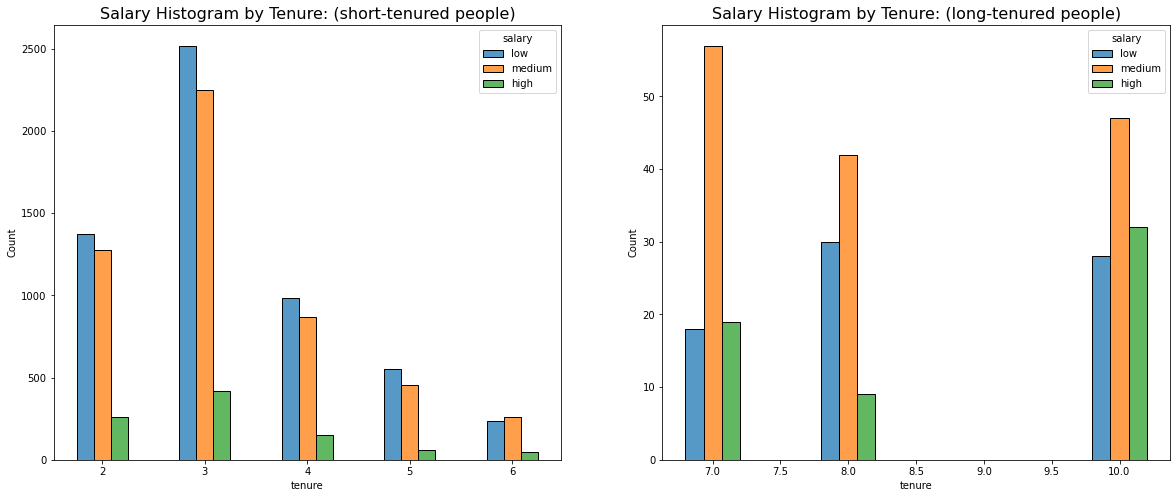

In [19]:
# Create a plot as needed
#Examine Salary Levels for different Tenures in Histograms
### YOUR CODE HERE ###
fig, ax = plt.subplots(1,2, figsize=(20,8))

tenure_short = df1[df1["tenure"] < 7]

tenure_long = df1[df1["tenure"] > 6]

sns.histplot(data=tenure_short, x="tenure", hue="salary", discrete=1, 
            hue_order=["low", "medium", "high"], multiple="dodge", shrink=.5, ax = ax[0])
ax[0].set_title("Salary Histogram by Tenure: (short-tenured people)", fontsize=16)

sns.histplot(data=tenure_long, x="tenure", hue="salary", discrete=1,
            hue_order=["low", "medium", "high"], multiple="dodge", shrink=.4, ax = ax[1])
ax[1].set_title("Salary Histogram by Tenure: (long-tenured people)", fontsize=16)

plt.show()

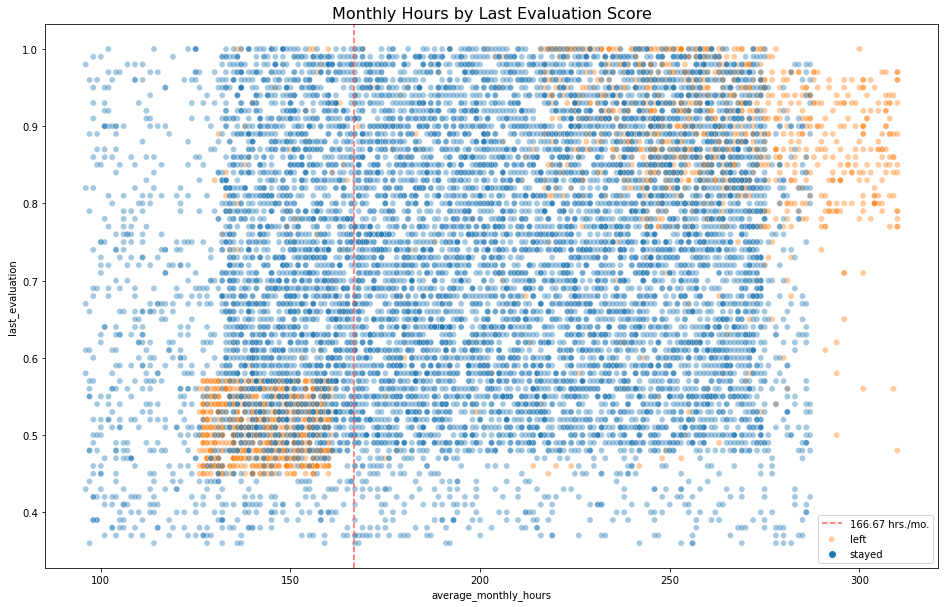

In [20]:
# Create a plot as needed
"""Explore whether there is a correlation between working long hours and receiving high evaluation scores using 
average_monthly_hours and last_evaluation in a scatterplot"""
### YOUR CODE HERE ###

plt.figure(figsize=(16,10))
sns.scatterplot(data=df1, x="average_monthly_hours", y="last_evaluation", hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title("Monthly Hours by Last Evaluation Score", fontsize=16);

Text(0.5, 1.0, 'Monthly Hours by Promotion Last 5 Years')

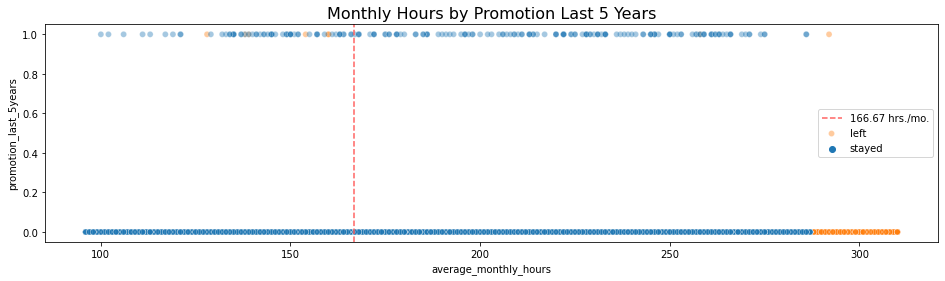

In [21]:
# Create a plot as needed
#Examine whether employees who worked very long hours received a promotion within the last 5 years
### YOUR CODE HERE ###
plt.figure(figsize=(16,4))
sns.scatterplot(data=df1, x='average_monthly_hours', y="promotion_last_5years", hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title("Monthly Hours by Promotion Last 5 Years", fontsize=16)


In [22]:
#Distribution of the departments of employees who left
df1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

In [23]:
#To show who received a promotion within last 5 years and left/stayed
left_and_promoted = df1[df1["left"] == 1]["promotion_last_5years"].count()
stayed_and_promoted = df1[df1["left"] == 0]["promotion_last_5years"].count()
print(left_and_promoted)
print(stayed_and_promoted)

1991
10000


Text(0.5, 1.0, 'Count of who Stayed/Left by Department')

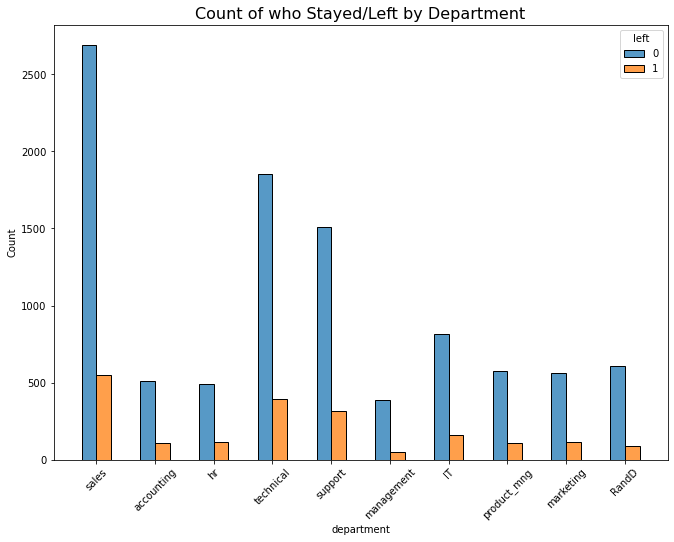

In [24]:
#Stacked histogram to compare department distribution of employees who left vs stayed
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x="department", hue="left", discrete=1,
            hue_order=[0, 1], multiple="dodge", shrink=.5)
plt.xticks(rotation="45")
plt.title("Count of who Stayed/Left by Department", fontsize=16)

Text(0.5, 1.0, 'Correlation Heatmap')

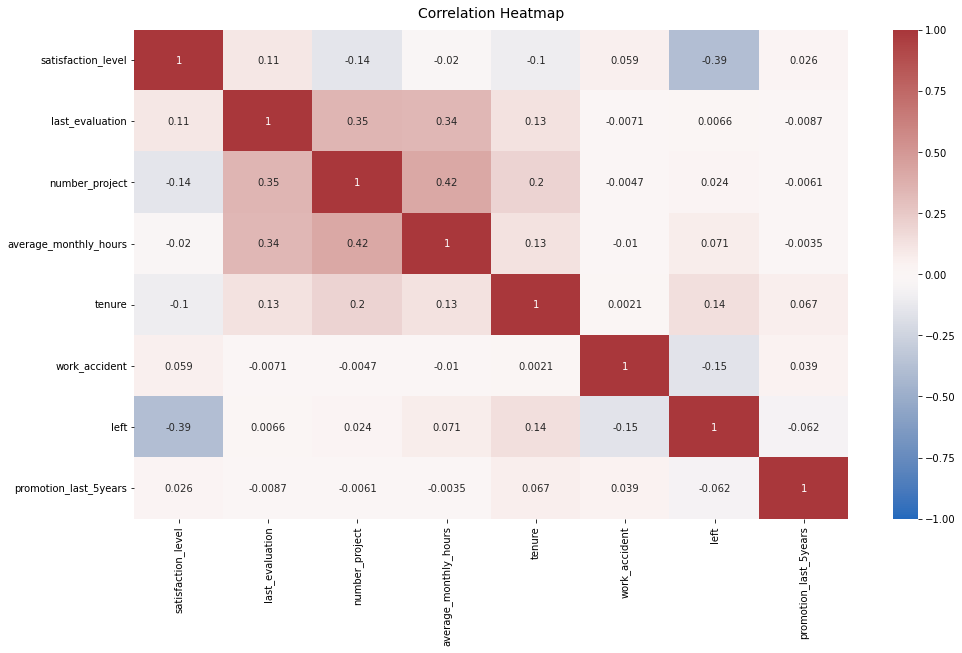

In [25]:
#Check between strong correlations between variables in the data (correlation heat map)
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title("Correlation Heatmap", fontdict={'fontsize':14}, pad=12)

### Insights

-All of the employees who worked the most hours left the company.
-The correlation heatmap shows that there is a positive correlation between numbers of projects, monthly hours, and evalution. Also an employee leaving is negatively correlated to their satisfaction level.

*Leaving appears to be tied to working many hours on many projects and having low satisfaction levels. It appears that the workers are burnt out from all of these factors. It's possible that most of the employee's that have left the company, are doing so as a result of poor management. It also appears that employees that have spent more than 6 years with the company tend not to leave. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The goal is to predict whether an employee will leave the company. This is a binary classification task between "left" and "stayed".

### Identify the types of models most appropriate for this task.

Since the variable that I want to predict (whether an employee leaves) is categorical, I could either build a logistic regression model or a tree-based machine learning model. 

### Modeling

Add as many cells as you need to conduct the modeling process.

In [26]:
#Encode the 2 categorical variables. 
#Encode Salary column as ordinal numeric category
#Dummy encode the Department column

df_enc = df1.copy()

df_enc["salary"] = (df_enc["salary"].astype("category").cat.set_categories(["low", "medium", "high"]).cat.codes)

df_enc = pd.get_dummies(df_enc, drop_first=False)

df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


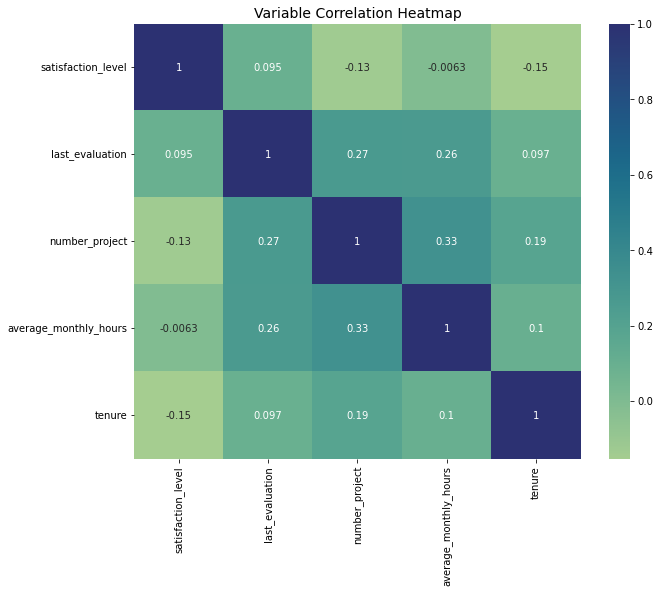

In [27]:
#Heatmap to visualize correlation between selected variables.
plt.figure(figsize=(10,8))
sns.heatmap(df_enc[["satisfaction_level", "last_evaluation", "number_project", 
                    "average_monthly_hours", "tenure"]].corr(), annot=True, cmap="crest")
plt.title("Variable Correlation Heatmap", fontsize=14)
plt.show()

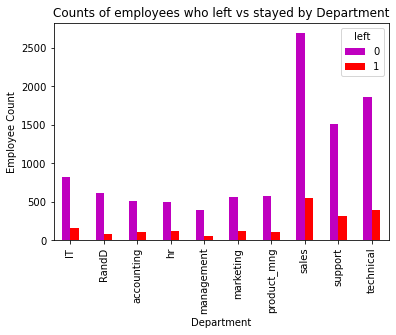

In [28]:
#Stacked bar plot to visualize employees by department for those who left and those who stayed with the company.
pd.crosstab(df1["department"], df1["left"]).plot(kind="bar", color="mr")
plt.title("Counts of employees who left vs stayed by Department")
plt.xlabel("Department")
plt.ylabel("Employee Count")
plt.show()

In [29]:
#Remove outliers 
df_logreg = df_enc[(df_enc["tenure"] >= lower_limit) & (df_enc["tenure"] <= upper_limit)]

df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [30]:
#Isolate outcome variable
y = df_logreg["left"]

y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [31]:
#Select the features
X = df_logreg.drop("left", axis=1)

X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [32]:
#Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [33]:
#Construct Logistic Regression model and fit it to the training data
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [34]:
#Use the logistic regression model to get predictions on the test data
y_pred = log_clf.predict(X_test)

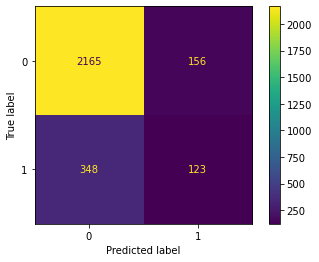

In [35]:
#Confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

log_disp.plot(values_format='')

plt.show()

In [36]:
#Check class balance
df_logreg["left"].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

About 83% stayed with the company and 17% left the company

In [37]:
#Create a classification report
target_names = ["Predicted would not leave", "Predicted would leave"]
print(classification_report(y_test, y_pred, target_names = target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the weighted average: precision score is 79%, recall score is 82%, and f1 score is 80%. However the scores are significantly lower for "Predicted would leave" compared to "Predicted would not leave. 

**Tree Based Model**

In [38]:
#Isolate the outcome variable
y = df_enc["left"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [39]:
#Select features
X = df_enc.drop("left", axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [40]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

**Decision Tree**

In [41]:
#Instantiate model
tree = DecisionTreeClassifier(random_state=0)

cv_params = {"max_depth": [4, 6, 8, None],
            "min_samples_leaf": [2, 5, 1],
            "min_samples_split": [2, 4, 6]}

scoring = {"accuracy", "precision", "recall", "f1", "roc_auc"}

#Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit="roc_auc")

In [42]:
#Fit the model to the training data
%time
tree1.fit(X_train, y_train)

CPU times: user 3 µs, sys: 4 µs, total: 7 µs
Wall time: 11.4 µs


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [43]:
#Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [44]:
#Check best AUC score on cv
tree1.best_score_

0.969819392792457

In [45]:
#Function that helps extract all the scores from the grid search

def make_results(model_name:str, model_object, metric:str):
    metric_dict = {"auc": "mean_test_roc_auc",
                  "precision": "mean_test_precision",
                  "recall": "mean_test_recall",
                  "f1": "mean_test_f1",
                  "accuracy": "mean_test_accuracy"}
    cv_results = pd.DataFrame(model_object.cv_results_)
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    
    table = pd.DataFrame()
    table = pd.DataFrame({"model": [model_name],
                         "precision": [precision],
                         "recall": [recall],
                          "F1": [f1],
                         "accuracy": [accuracy],
                         "auc": [auc]})
    return table 

In [46]:
#Get CV Scores
tree1_cv_results = make_results("decision tree cv", tree1, "auc")
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


**Random Forest**

In [47]:
#Instantiate RF Model
rf = RandomForestClassifier(random_state=0)

cv_params = {"max_depth": [3, 5, None],
             "max_features": [1.0],
             "max_samples": [0.7, 1.0],
             "min_samples_leaf": [1, 2, 3],
             "min_samples_split": [2, 3, 4],
             "n_estimators": [300, 500]}

scoring = {"accuracy", "precision", "recall", "f1", "roc_auc"}

rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit="roc_auc")

In [48]:
%time
rf1.fit(X_train, y_train)

CPU times: user 3 µs, sys: 3 µs, total: 6 µs
Wall time: 11.9 µs


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [49]:
path = '/home/jovyan/work'

In [50]:
def write_pickle(path, model_object, save_as:str):
    with open(path + save_as + ".pickle", "wb") as to_write:
        pickle.dump(model_object, to_write)

In [51]:
def read_pickle(path, saved_model_name:str):
    with open(path + saved_model_name + ".pickle", "rb") as to_read:
        model = pickle.load(to_read)
    return model 

In [52]:
write_pickle(path, rf1, 'hr_rf1') 

In [53]:
rf1 = read_pickle(path, "hr_rf1")

In [54]:
#Best AUC score on CV
rf1.best_score_

0.9804250949807172

In [55]:
#Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [56]:
#Get all CV Scores
rf1_cv_results = make_results("random forest cv", rf1, "auc")
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


In [57]:
#Define a function that gets all the scores a models predictions
def get_scores(model_name:str, model, X_test_data, y_test_data):
    preds = model.best_estimator_.predict(X_test_data)
    
    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
    
    table = pd.DataFrame({"model": [model_name],
                          "precision": [precision],
                          "recall": [recall], 
                          "f1": [f1],
                          "accuracy": [accuracy],
                          "AUC": [auc]
                         })
    return table

In [58]:
#Get predictions on test data
rf1_test_scores = get_scores("random forest1 test", rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.964211,0.919679,0.941418,0.980987,0.956439


In [59]:
#Feature Engineering dropping satisfaction level and creating a binary variable/feature "overworked" column
df2 = df_enc.drop("satisfaction_level", axis=1)
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [60]:
#Create overworked column 
df2["overworked"] = df2["average_monthly_hours"] 
print("Max hours:", df2["overworked"].max())
print("Min hours:", df2["overworked"].min())

Max hours: 310
Min hours: 96


**166.67 is approximately the average number of monthly hours that an employee works.**
*I could define that being overworked is working over 175 hours per month on average*

In [61]:
df2["overworked"] = (df2["overworked"] > 175).astype(int)
df2["overworked"].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [62]:
df2 = df2.drop("average_monthly_hours", axis=1)
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [63]:
#Isolate outcome variable 
y = df2["left"]
#Select features
X = df2.drop("left", axis=1)

In [64]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#**Decision Tree 2**

In [65]:
#Instantiate model 
tree = DecisionTreeClassifier(random_state=0)

#Set the CV parameters
cv_params = {"max_depth": [4,6,8,None],
             "min_samples_leaf": [2,5,1],
             "min_samples_split": [2,4,6]
            }

#Set the scoring metrics for the model  
scoring = {"accuracy", "precision", "recall", "f1", "roc_auc"}

#Instantiate Gridsearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit="roc_auc")

In [66]:
#Fit the model
%time
tree2.fit(X_train, y_train)

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 13.8 µs


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [67]:
#Check the best parameters
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [68]:
#Check the best AUC score
tree2.best_score_

0.9586752505340426

In [69]:
tree2_cv_results = make_results("decision tree2 cv", tree2, "auc")
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


**Random Forest 2**

In [70]:
rf = RandomForestClassifier(random_state=0)

cv_params = {"max_depth": [3,5,None],
             "max_features": [1.0],
             "max_samples": [0.7, 1.0],
             "min_samples_leaf": [1,2,3],
             "min_samples_split": [2,3,4],
             "n_estimators": [300, 500]}

scoring = {"accuracy", "precision", "recall", "f1", "roc_auc"}

rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit="roc_auc")  

In [71]:
%time
rf2.fit(X_train, y_train)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.78 µs


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [72]:
#Write pickle
write_pickle(path, rf2, "hr_rf2")

In [73]:
#Load pickle
rf2 = read_pickle(path, "hr_rf2")

In [74]:
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [75]:
rf2.best_score_

0.9648100662833985

In [76]:
#Get all CV Scores
rf2_cv_results = make_results("random forest2 cv", rf2, "auc")
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481


In [77]:
rf2_test_scores = get_scores("random forest2 test", rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.870406,0.903614,0.8867,0.961641,0.938407


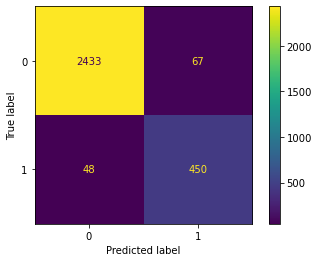

In [78]:
#Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

#Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf2.classes_)
disp.plot(values_format='');

**RUN THESE CELLS LAST!!!**

In [79]:
###########RF2 on test set#############
# rf = RandomForestClassifier(random_state=0)

# cv_params = {"max_depth": [3,5,None],
#              "max_features": [1.0],
#              "max_samples": [0.7, 1.0],
#              "min_samples_leaf": [1,2,3],
#              "min_samples_split": [2,3,4],
#              "n_estimators": [300, 500]}

# scoring = {"accuracy", "precision", "recall", "f1", "roc_auc"}

# rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit="roc_auc")  

In [80]:
###Fit the RF2 to the test set###
#rf2.fit(X_test, y_test)

The model predicts more false positives than false negatives, but is still a strong model.

In [81]:
#Inspect the splits of the decision tree model and the most important features in the random forest model.

**Decision Tree Splits**

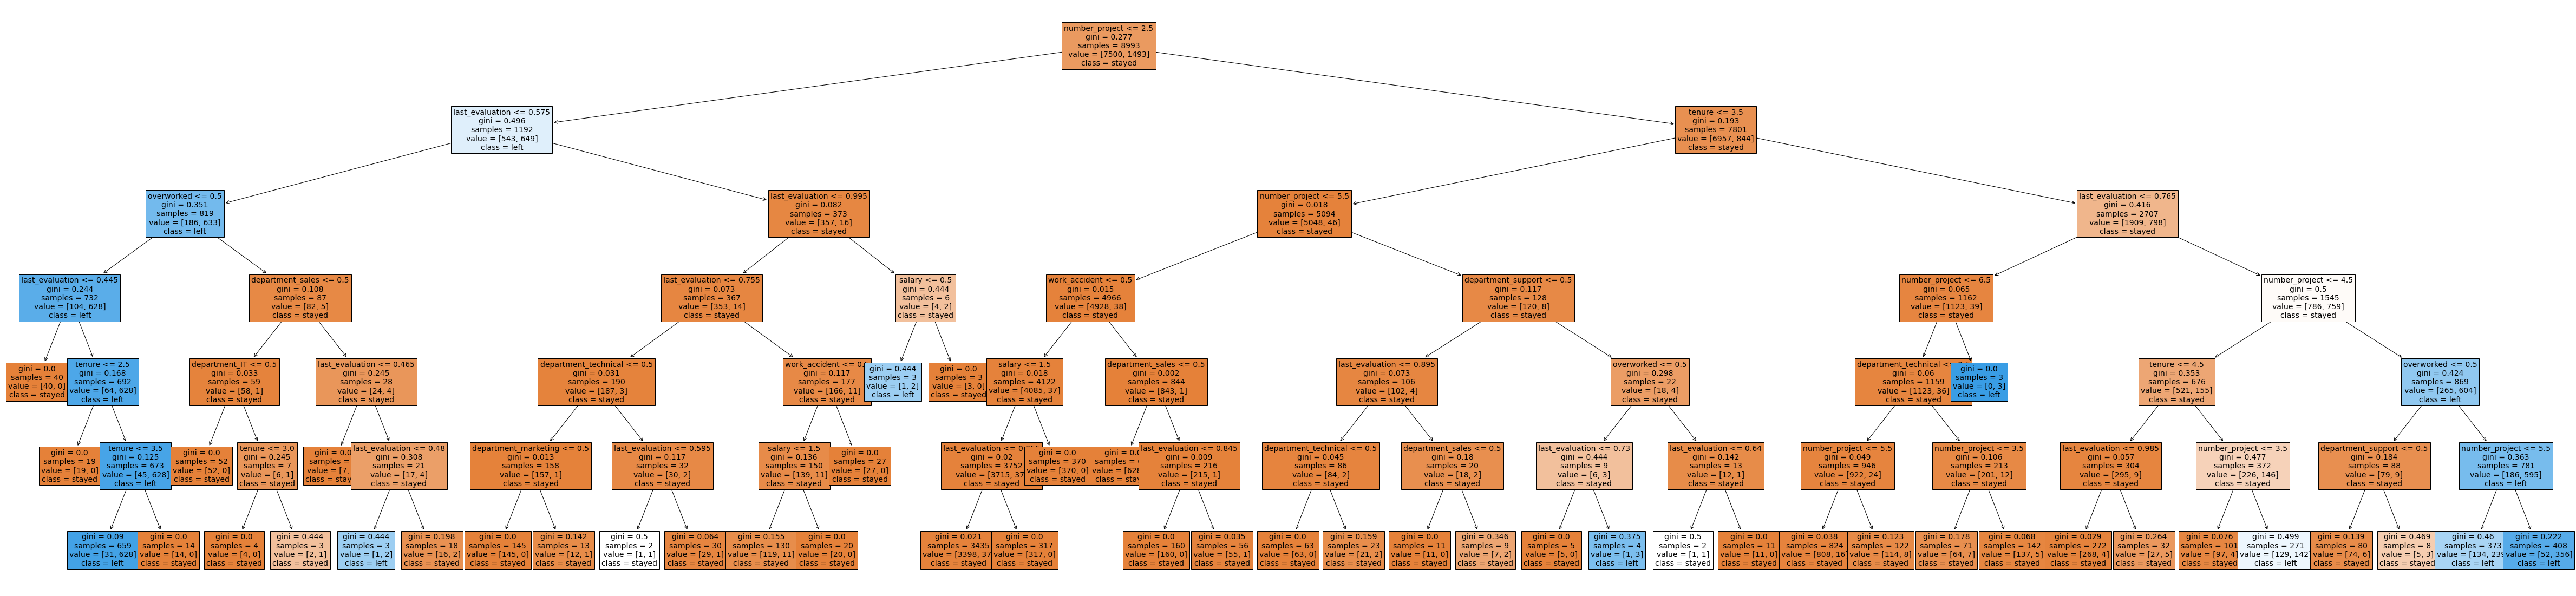

In [82]:
#Plot the Tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns,
         class_names={0: "stayed", 1: "left"}, filled=True)
plt.show()

**Decision Tree Feature Importance**

In [83]:
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_,
                                columns=["gini_importance"],
                                index=X.columns)
tree2_importances = tree2_importances.sort_values(by="gini_importance", ascending=False)

#Only extract features with importances > 0
tree2_importances = tree2_importances[tree2_importances["gini_importance"] != 0]
tree2_importances

,gini_importance
last_evaluation,0.343958
number_project,0.343385
tenure,0.215681
overworked,0.093498
department_support,0.001142
salary,0.000910
department_sales,0.000607
department_technical,0.000418
work_accident,0.000183
department_IT,0.000139


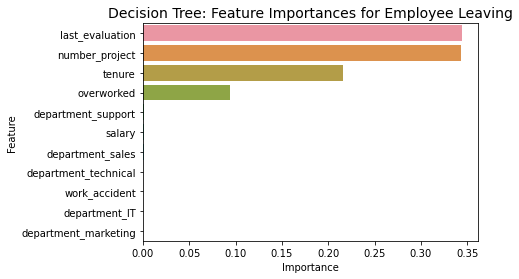

In [84]:
#Create a barplot to visualise the decision tree feature importances

sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient="h")
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=14)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

*The barplot shows that in this decision tree model, last_evaluation, number_project, tenure, and overworked have the highest importance. These variables are most important in predicting the outcome variable "left".*

**Random Forest Feature Importance**

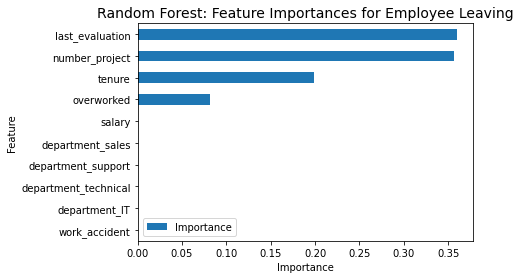

In [85]:
#Plot feature importance of RF model

#Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

#Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

#Get column labels of top 10 importances
feat = X.columns[ind]

#Filter feat_impt to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind="barh", ax=ax1, x="Feature", y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=14)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

*The plot above shows that in this random forest model: last_evaluation, number_project, tenure, and overworked have the highest importance. These are the same as in the decision tree model, and in the same order.*

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



The variables: "last_evaluation", "number_project", "tenure", and "overworked" have the highest importance in the dataset. These variables are most important in predicting the outcome variable "left". The Random Forest model performs very well. The only way that I could see any significant improvement in the model is with having access to more data to work with for each individual. Having that kind of data might provide more insight into being able to better predict the outcome variable. I used Gemini as a resource and also asked some questions on stack overflow and the Coursera community. Also I feel that it would be useful to know of the employees who left, which of the employees quit compared to which employees were let go/fired. I think that this would be useful information for this project specifically. Having that information would give me a better understanding of the dataset and being able to predict the outcome variable. I am actually surprised that there is no column or anything indicating whether or not an employee quit or was fired.

### RANDOM NOTES:

In [144]:
#RANDOM NOTES OF COUNTS OF LAST_EVAL <= SPECIFIC PERCENTAGES 

below_50 = df2[df2["last_evaluation"] < .5]
above_50 = df2[df2["last_evaluation"] >= .5]
above_70 = df2[df2["last_evaluation"] >= .7]
below_70 = df2[df2["last_evaluation"] < .7]
above_30 = df2[df2["last_evaluation"] >= .3]
below_30 = df2[df2["last_evaluation"] < .3]
above_40 = df2[df2["last_evaluation"] >= .4]
below_40 = df2[df2["last_evaluation"] < .4]
eval_left = df2[df2["last_evaluation"] < 1]["left"].count()
#print(eval_left)
#print(below_40.count())

#Above/Below % for last_evaluation 

#Below_50 = 1161
#Above_50 = 10830
#Total = 11991
#Above_70 = 6428
#Below_70 = 5563
#Above_30 = 11991
#Below_30 = 0
#Above_40 = 11839
#Below_40 = 152

#11791 people left
#10561 left with last_eval score greater than .5
#Everyone with a last_eval score less than .4 left = 152
#1161 left with last_eval score less than .5
#3637 left with last_eval score less than .6
#5563 left with last_eval score less than .7
#7505 left with last_eval score less than .8
#9666 left with last_eval score less than .9

SyntaxError: invalid syntax (<ipython-input-144-049fe2333fe3>, line 35)

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression Model Metrics on Test Set :**

*Precision: 79% , Recall: 82%, F1: 80% (all weighted averages) and Accuracy:82%*


**Tree-Based Model Metrics After conducting Feauture Engineering:**
      
|------Model---------|-Precision-|--Recall---|-----F1----|-Accuracy-|--AUC--|
     
      
      
Decision Tree2 cv---| 0.856693   | 0.903553 | 0.878882 | 0.958523 | 0.958675 |

Random Forest2 cv | 0.866758   | 0.878754 | 0.872407 | 0.957411 | 0.96481 |



**The Random Forest Model performed slightly better than the Decision Tree Model, using AUC as the deciding metric. Even though the Decision Tree did slightly better as far as Recall, F1, and Accuracy.** 

__________________________________________________________________________


**The Metrics for the Random Forest (Champion model) on the Test Data After conducting Feature Engineering:**

  
|--------Model---------|-Precision-|--Recall---|---F1---|-Accuracy-|--AUC--|


Random Forest2 test | 0.870406 | 0.903614 | 0.8867 |  0.961641  | 0.938407 |
  
  

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that the employees at Salifort Motors are overworked.

To retain employees, the following recommendations can be presented to the stakeholders:

•Limit the number of projects that an employee can work on.

•Consider promoting employees that have been with the company for at least 4 years. Investigate further as to why 4 year tenured employees are so dissatisfied.

•Reward employees for longer hours worked, or dont require them to work as many hours.

•Reward employees for contributing more, putting in more effort and for higher evaluation scores.


### Next Steps:

It could be more useful to update the data to specify which employees quit and which employees were let go/fired from the company. Also considering how predictions change when last_evaluation is removed from the data. It might be more useful to predict employee retention without this feature, since it is possible that evaluations are not performed very frequently. Last_evaluation and satisfaction_score can be directly related to an employee that is on the verge of leaving the company, so it may be useful to leave variables like that out of the predictions. It is justified to still have concerns about this type of data leakage. With more data we could continue to improve the RF model even more on predicting employee retention. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.